# Supervised Learning: K-Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import mglearn

`make_forge()`를 사용할때에 `make_blob()` 관련 워닝이 나와서 이걸로 막아줍니다.

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Overview

KNN classification, regression 을 데이터셋에서 돌려봅니다.

| Algorithm | Dataset |
|--|--|
| KNN Classification | make_blobs(), breast cancer |
| KNN Regression | make_wave() |

## K-Neighbors classification

### Dataset: make_blobs()

우선 KNN 이 prediction 에 대해서 어떤식으로 주위를 찾아주는지 그래프로 보죠.

(`mglearn.plots.plot_knn_classification`이 제공되지만 ax는 받지 않기에 카피해서 다시 썼습니다.)

In [3]:
def plot_knn_classification(n_neighbors=1, ax=None):
    from sklearn.metrics import euclidean_distances
    from sklearn.neighbors import KNeighborsClassifier

    from mglearn.datasets import make_forge
    from mglearn.plot_helpers import discrete_scatter
    
    X, y = make_forge()

    X_test = np.array([[8.2, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            ax.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                     X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*", ax=ax)
    training_points = discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbors");

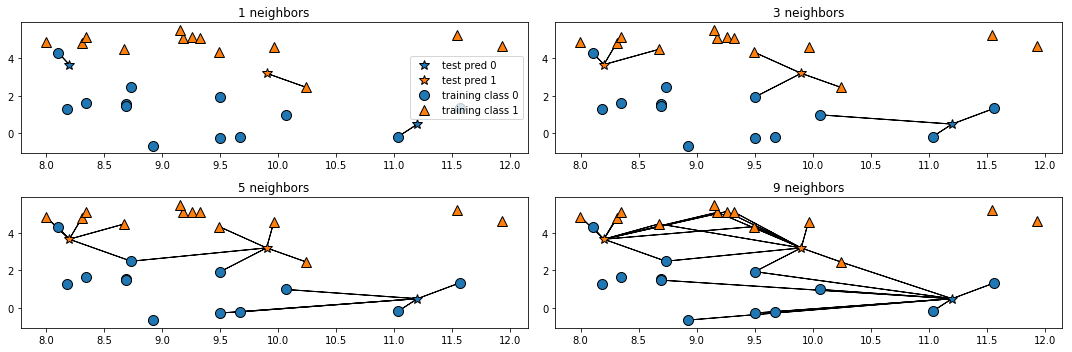

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
ax = axes.ravel()

for i, n_neighbors in enumerate([1, 3, 5, 9]):
    plot_knn_classification(n_neighbors=n_neighbors, ax=ax[i]);
ax[0].legend(["test pred 0", "test pred 1", "training class 0", "training class 1"], loc="best");
fig.tight_layout();

각각의 다른 k 값에 대해서 정확도를 봅시다

(항상 같네요...86%로... `make_forge()` 에 대해서는...)

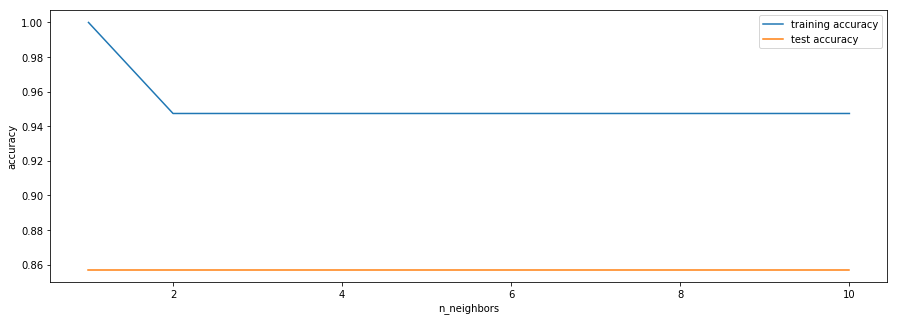

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(15, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend();

decision boundry 를 볼 수 있게 `mglearn`에서 제공하네요.

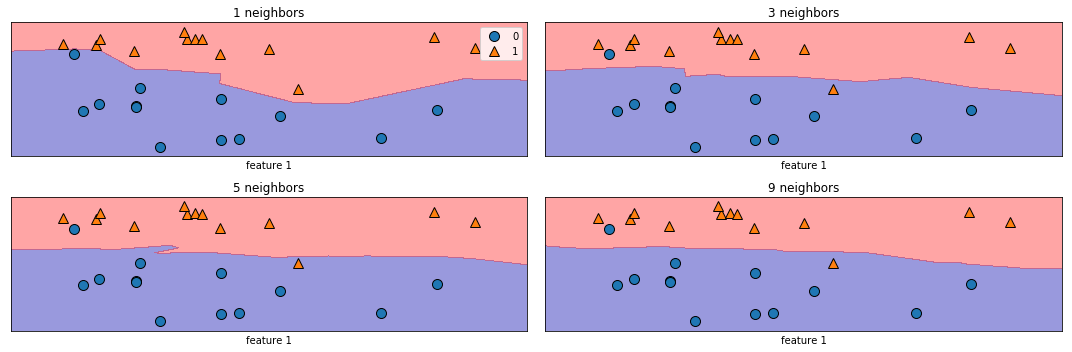

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
ax = axes.ravel()

for i, n_neighbors in enumerate([1, 3, 5, 9]):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax[i], alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax[i])
    ax[i].set_title(f"{n_neighbors} neighbors")
    ax[i].set_xlabel("feature 0")
    ax[i].set_xlabel("feature 1")
ax[0].legend(loc="best")
fig.tight_layout();

### Dataset: breast cancer

이 데이터셋은 `make_forge()`보다는 다양한 숫자를 보여주네요. `k`값을 바꿈에 따라서 accuracy 가 변합니다.

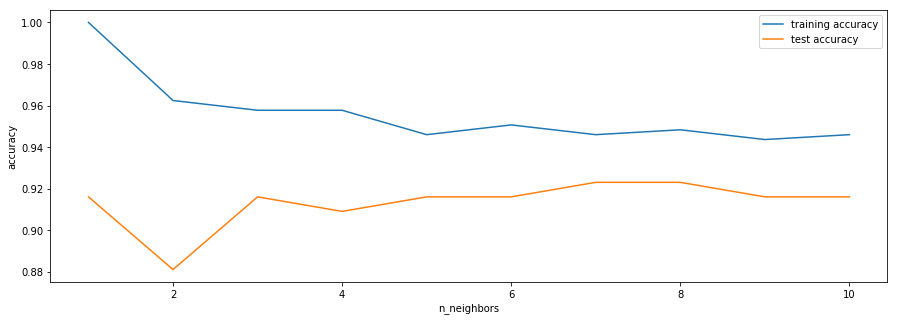

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(15, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend();

## K-Neighbors regression

### Dataset: make_wave()

이제 보니 `make_forge()`가 classification 에서 사용할 간단한 데이터셋이고,

그에 해당하는 `make_wave()`, `make_moons()`, `make_circles()`가 regression 용이네요.

우선, `make_wave()`로 `k`가 변할때마다 regression 결과가 어떻게 변하는지 살펴보겠습니다.

In [8]:
def plot_knn_regression(n_neighbors=1, ax=None):
    from sklearn.metrics import euclidean_distances
    from sklearn.neighbors import KNeighborsRegressor

    from mglearn.datasets import make_wave
    from mglearn.plot_helpers import discrete_scatter
    
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                ax.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                         head_width=0, fc='k', ec='k')

    train, = ax.plot(X, y, 'o', c=mglearn.cm3(0))
    test, = ax.plot(X_test, -3 * np.ones(len(X_test)), '*', c=mglearn.cm3(2), markersize=15)
    pred, = ax.plot(X_test, y_pred, '*', c=mglearn.cm3(0), markersize=15)
    ax.vlines(X_test, -3.1, 3.1, linestyle="--")
    ax.set_title(f"{n_neighbors} neighbors");

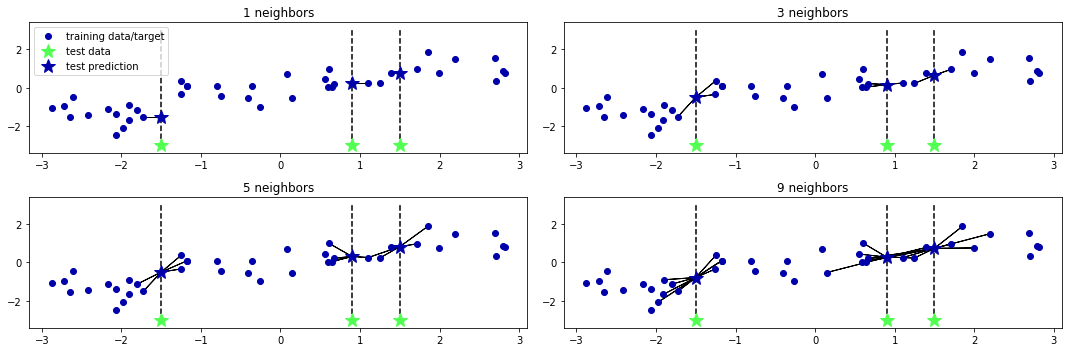

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
ax = axes.ravel()

for i, n_neighbors in enumerate([1, 3, 5, 9]):
    plot_knn_regression(n_neighbors=n_neighbors, ax=ax[i]);
ax[0].legend(["training data/target", "test data", "test prediction"], loc="best");
fig.tight_layout();

같은 방식으로 `k`가 변함에 따라 정확도 변화를 보죠.

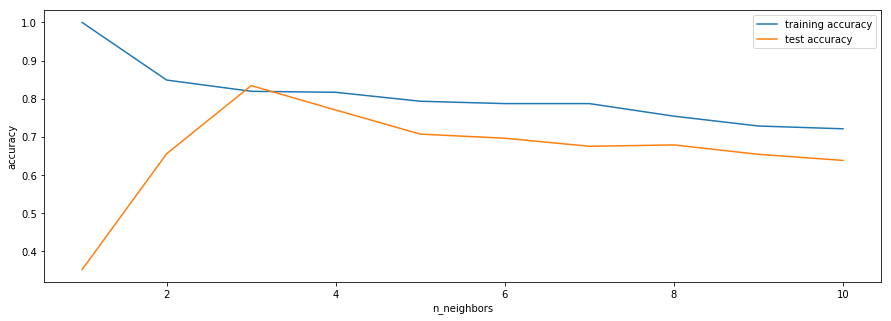

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))
    
plt.figure(figsize=(15, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend();

마지막으로 `make_wave()` 에서 모델별로 실제 wave 를 그려본후 training, test 값들이 어느 분포에 존재하는지 보겠습니다.

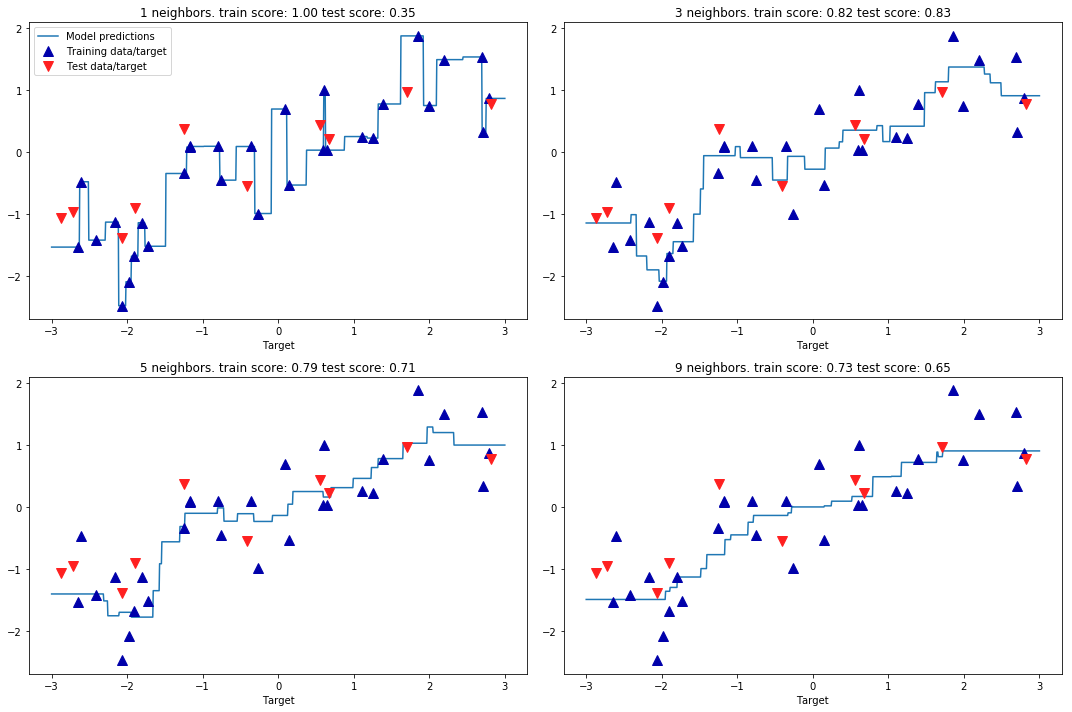

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes.ravel()
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for i, n_neighbors in enumerate([1, 3, 5, 9]):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    
    ax[i].plot(line, reg.predict(line))
    ax[i].plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=10)
    ax[i].plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=10)
    
    ax[i].set_title(f"{n_neighbors} neighbors. "
                    f"train score: {reg.score(X_train, y_train):.2f} "
                    f"test score: {reg.score(X_test, y_test):.2f}"
                   )
    ax[i].set_xlabel("Feature")
    ax[i].set_xlabel("Target")
ax[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
fig.tight_layout();

## TODO

- **test**: 위에서 코드 따라해보다가 `model.fit(X_train, y_train)`을 `model.fit(X, y)`라고 써서 책처럼 결과가 안나와서 엄청 헤맸습니다. 내가 실수없이 코딩을 하고 있는지 알 방법이 없을까요?

## k-NN의 장단점

- Distance 를 어케 정하는가?
    - 이 책의 범위가 아니라네요
    - 보통 euclidean distance 가 사용된다고 (위의 코드들에서도...)
- 장점
    - Easy to understand
    - Reasonable performance
- 단점
    - Slow: training set size 가 커지면 느려집니다
    - Preprocessing 중요합니다